In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt


tensor([0.3239, 0.7544, 0.9622, 0.2825, 0.0186, 0.2737, 0.0954, 0.4138, 0.6857,
        0.7151])
tensor([0.5036, 0.5831, 0.1441, 0.6812, 0.2961, 0.3635, 0.9057, 0.5475, 0.5760,
        0.6837])
tensor([0.3681, 0.1709, 0.8635, 0.5511, 0.7457, 0.5278, 0.9042, 0.4051, 0.8503,
        0.5276])


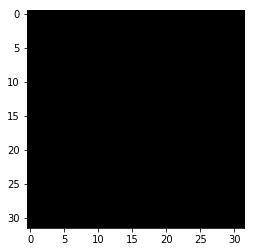

In [23]:
# m x n matrices, m = rows n = cols

r = torch.rand(10)
g = torch.rand(10)
b = torch.rand(10)

test1 = np.zeros((32,32,3))
test2 = np.random.rand(32,32,3)

print (r)
print (g)
print (b)
#print (test1)
#print (test2)

plt.imshow(test1)


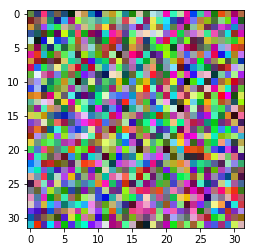

In [24]:
plt.imshow(test2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


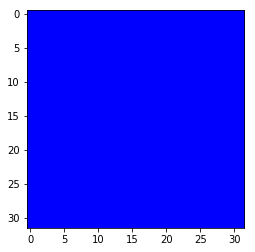

In [33]:
test2_shape = test2.shape

#for i in range(test2_shape[0]):
    #for j in range(test2_shape[1]):
        #test2[i,j] = 0
        
for i in range(test2_shape[0]):
    for j in range(test2_shape[1]):
            test2[i,j,0] = 0
            test2[i,j,1] = 0
            test2[i,j,2] = 255
            
plt.imshow(test2)
        

In [21]:
#class Net(nn.Module): # nn.Module is the parent class
    #def __init__(self,input_size,hidden_size,output_size):
        #super(Net,self).__init__() # super used to pass arguemtns of child class to parent class
    #def __forward__(self,input):
        